<a href="https://colab.research.google.com/github/KhotNoorin/Machine-Learning-/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdaBoost:

---


AdaBoost is short for Adaptive Boosting, an ensemble learning technique that combines many weak learners to create a strong learner.

In simple terms:

- Each model learns from the mistakes of the previous one.

- AdaBoost focuses more on the hard-to-classify samples by increasing their weight.


---

Key Concepts of AdaBoost:
1. Weak Learners: Each classifier does slightly better than random guessing.
2. Sequential Learning: Learners are added one by one, and each tries to correct the mistakes of the previous ones.
3. Weighting:
  - Sample weights: More focus is given to samples that were misclassified.
  - Classifier weights: More accurate classifiers get higher say in the final prediction.



---
How AdaBoost Works:
1. Initialize weights: Start with equal weights for all training samples.
2. For each iteration (say T times):
  - Train a weak learner.
  - Calculate its error rate.
  - Compute its alpha (importance weight) based on error.
  - Increase weights of misclassified samples.
3. Final model: Weighted majority vote of all weak learners.



---

Advantages:
- Improves accuracy of weak models.
- Works well with imbalanced datasets.
- Robust to overfitting (to a degree).


---


Disadvantages:
- Sensitive to noisy data and outliers.
- Slower to train than single models.

---

Important Parameters:


| Parameter        | Description                              |
| ---------------- | ---------------------------------------- |
| base_estimator | The weak learner (usually a stump)       |
| n_estimators   | Number of boosting rounds                |
| learning_rate  | Shrinks the contribution of each learner |
| algorithm      | 'SAMME' or 'SAMME.R' (real boosting) |



---

Intuition Behind Weight Updates
- Correct classifications: their weights are decreased.
- Incorrect classifications: their weights are increased (so next learner focuses on them).
- Each classifier gets a weight based on its accuracy — more accurate classifiers have more influence.



---

Summary:

| **Aspect**                    | **Details**                                                                      |
| ----------------------------- | -------------------------------------------------------------------------------- |
| **Type**                      | Ensemble Learning (Boosting)                                                     |
| **Goal**                      | Combine multiple weak learners into a strong learner                             |
| **Common Weak Learner**       | Decision Stump (tree with depth = 1)                                             |
| **Model Combination**         | Weighted sum of weak learners' predictions                                       |
| **Learning Type**             | Sequential (learners trained one after another)                                  |
| **Adaptiveness**              | Focuses on misclassified samples by increasing their weights                     |
| **Classifier Weight Formula** | $\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \varepsilon_t}{\varepsilon_t}\right)$ |
| **Prediction Rule**           | $H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)$               |
| **Strengths**                 | Simple, good accuracy, less prone to overfitting than other models               |
| **Weaknesses**                | Sensitive to noise and outliers                                                  |
| **Main Hyperparameters**      | n_estimators, learning_rate, base_estimator                                |
| **Learning Rate**             | Shrinks the contribution of each weak learner (default = 1.0)                    |
| **Implementation (sklearn)**  | sklearn.ensemble.AdaBoostClassifier                                            |
| **Typical Use Cases**         | Classification tasks (e.g., spam detection, fraud detection)                     |



---



In [80]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [81]:
df = pd.DataFrame()

In [82]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [83]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

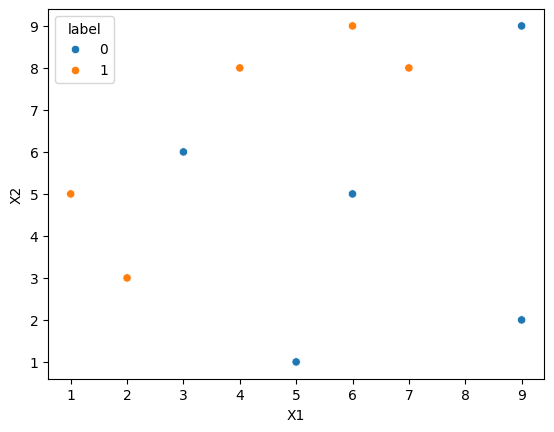

In [84]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [85]:
df['weights'] = 1/df.shape[0]

In [86]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [89]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [90]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

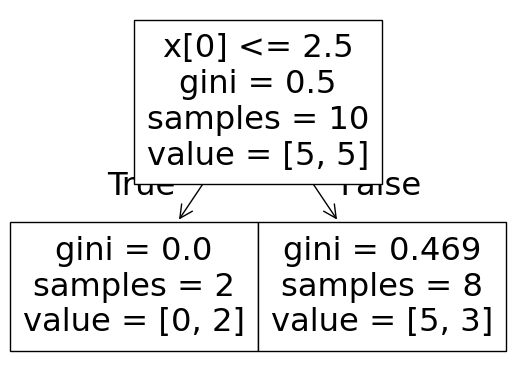

In [91]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

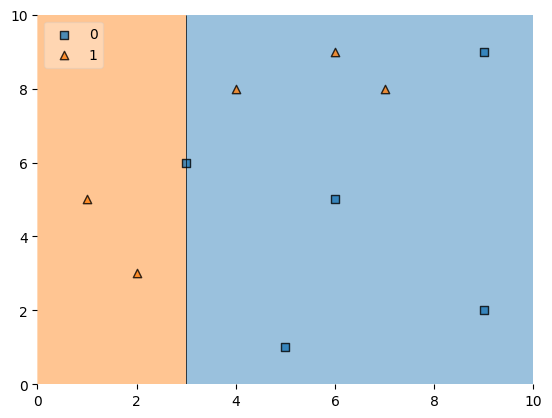

In [92]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [93]:
df['y_pred'] = dt1.predict(X)

In [94]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [95]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [96]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [97]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [98]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [99]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [100]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [101]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [102]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [103]:
df['nomalized_weights'].sum()

np.float64(1.0)

In [104]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [105]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [106]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [107]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [108]:
index_values = create_new_dataset(df)

In [109]:
index_values

[1, 3, 3, 9, 5, 4, 7, 5, 7, 3]

In [110]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [111]:
second_df

,X1,X2,label,weights
1,2,3,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1


In [112]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [113]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [114]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.625, 0.5, '  False')]

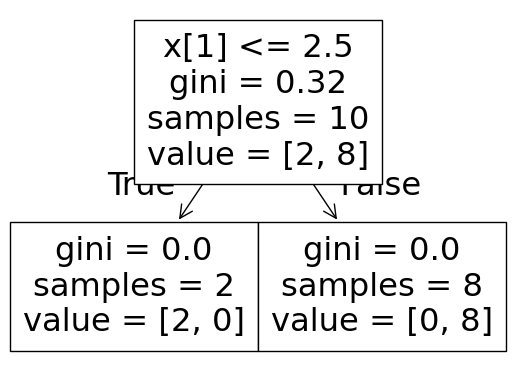

In [115]:
plot_tree(dt2)

<Axes: >

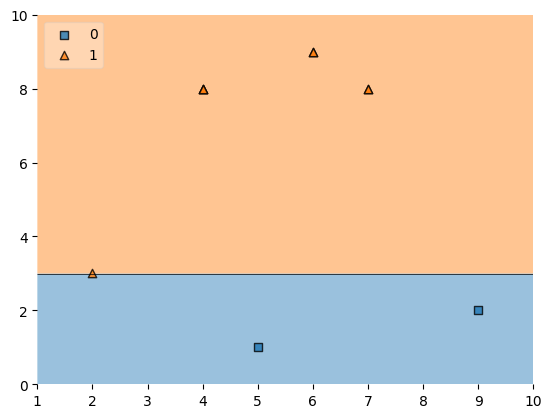

In [116]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [117]:
second_df['y_pred'] = dt2.predict(X)

In [118]:
second_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
9,9,2,0,0.1,0
5,6,9,1,0.1,1
4,5,1,0,0.1,0
7,7,8,1,0.1,1
5,6,9,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1


In [119]:
alpha2 = calculate_model_weight(0.1)

In [120]:
alpha2

np.float64(1.0986122886681098)

In [121]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [123]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [124]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
1,2,3,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622


In [125]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [126]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
1,2,3,1,0.1,1,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
9,9,2,0,0.1,0,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
4,5,1,0,0.1,0,0.033622,0.1
7,7,8,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
7,7,8,1,0.1,1,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1


In [127]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999998)

In [128]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [129]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.1,0.0,0.1
3,4,8,1,0.1,1,0.1,0.1,0.2
3,4,8,1,0.1,1,0.1,0.2,0.3
9,9,2,0,0.1,0,0.1,0.3,0.4
5,6,9,1,0.1,1,0.1,0.4,0.5
4,5,1,0,0.1,0,0.1,0.5,0.6
7,7,8,1,0.1,1,0.1,0.6,0.7
5,6,9,1,0.1,1,0.1,0.7,0.8
7,7,8,1,0.1,1,0.1,0.8,0.9
3,4,8,1,0.1,1,0.1,0.9,1.0


In [130]:
index_values = create_new_dataset(second_df)

In [131]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [132]:
third_df

,X1,X2,label,weights
4,5,1,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
4,5,1,0,0.1
9,9,2,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
4,5,1,0,0.1
9,9,2,0,0.1


In [133]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

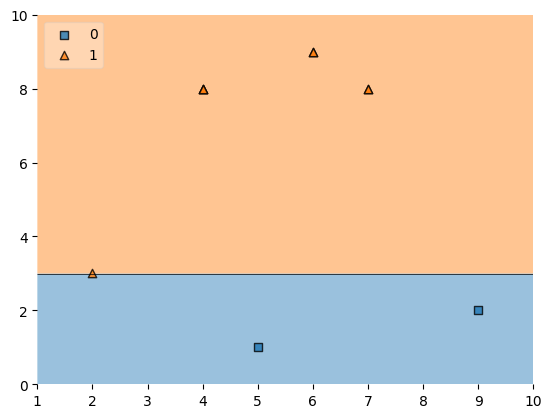

In [134]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [135]:
third_df['y_pred'] = dt3.predict(X)

In [136]:
third_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,1
9,9,2,0,0.1,1
9,9,2,0,0.1,1
4,5,1,0,0.1,0
9,9,2,0,0.1,1
3,4,8,1,0.1,0
9,9,2,0,0.1,1
9,9,2,0,0.1,1
4,5,1,0,0.1,1
9,9,2,0,0.1,1


In [137]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [138]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


# Prediction

In [139]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [140]:
dt2.predict(query)

array([1])

In [141]:
dt3.predict(query)

array([1])

In [142]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

In [143]:
np.sign(1.09)

np.float64(1.0)

In [144]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [145]:
dt2.predict(query)

array([1])

In [146]:
dt3.predict(query)

array([1])

In [147]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [148]:
np.sign(-0.25)

np.float64(-1.0)



---

# Adaboost Hyperparameter:


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

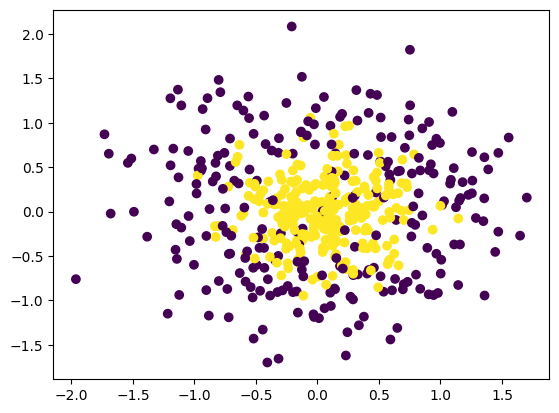

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

np.float64(0.812)

In [5]:
abc.fit(X,y)

AdaBoostClassifier()

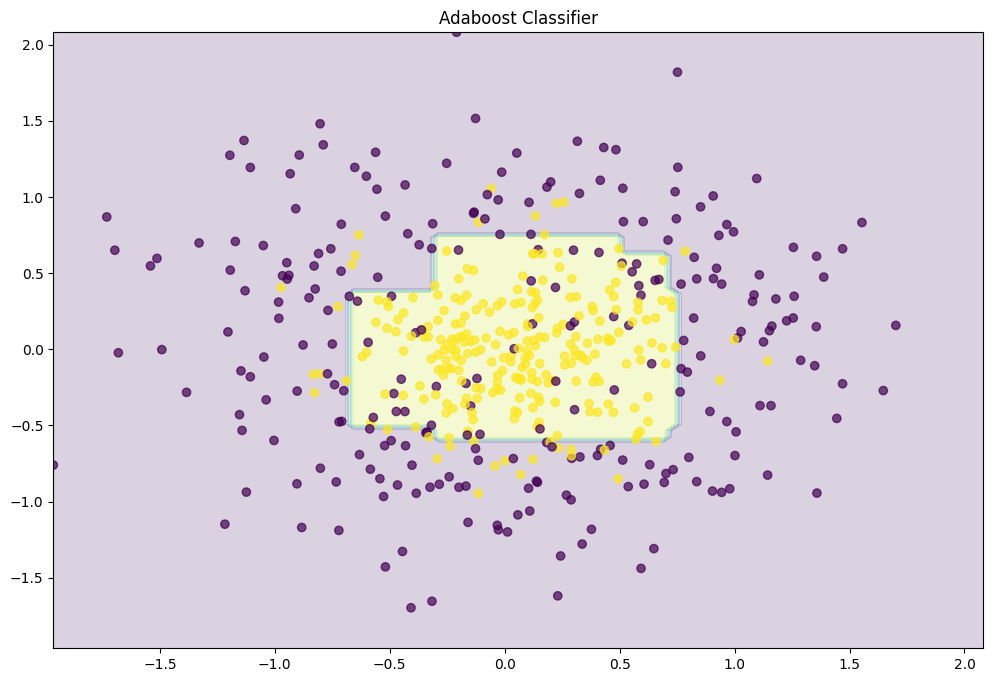

In [6]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(abc)

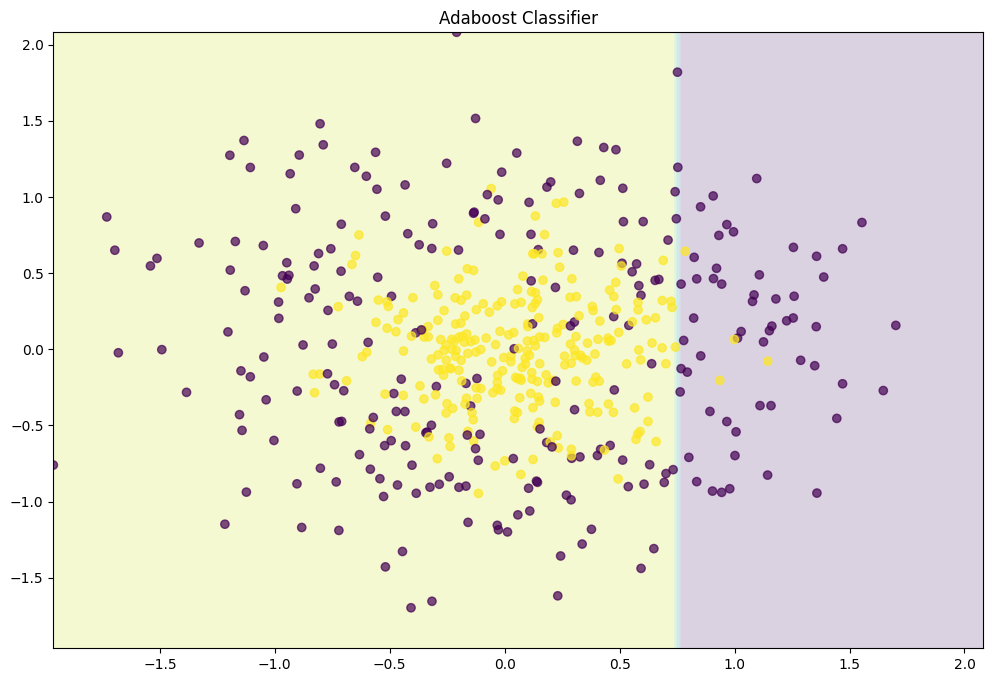

In [13]:
abc = AdaBoostClassifier(n_estimators=1)
abc.fit(X,y)
plot_decision_boundary(abc)

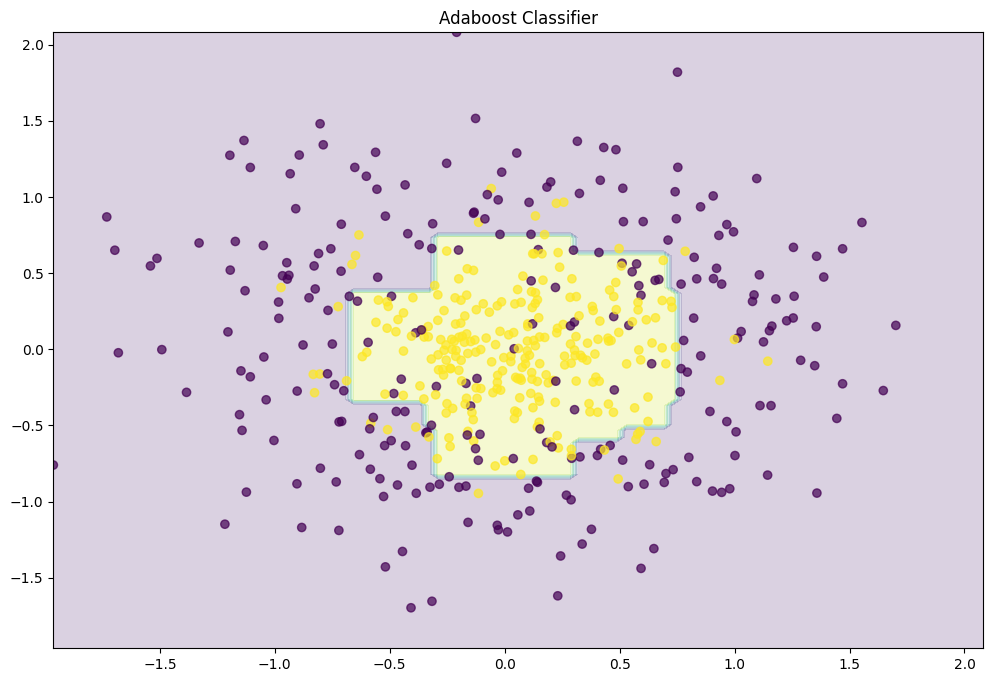

In [14]:
abc = AdaBoostClassifier(n_estimators=150)
abc.fit(X,y)
plot_decision_boundary(abc)

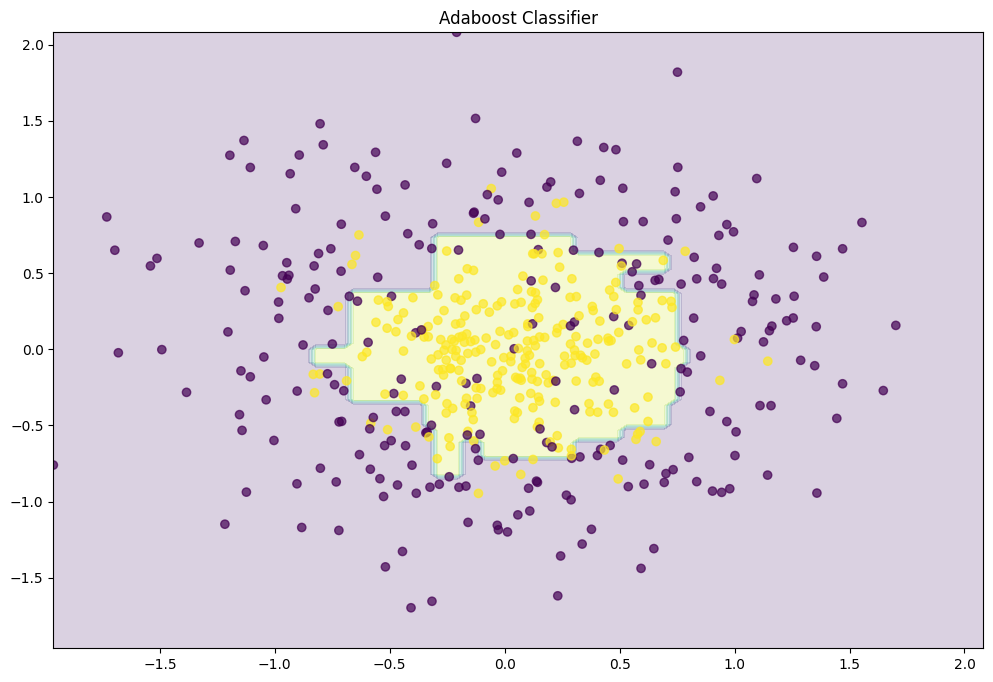

In [15]:
abc = AdaBoostClassifier(n_estimators=1500)
abc.fit(X,y)
plot_decision_boundary(abc)

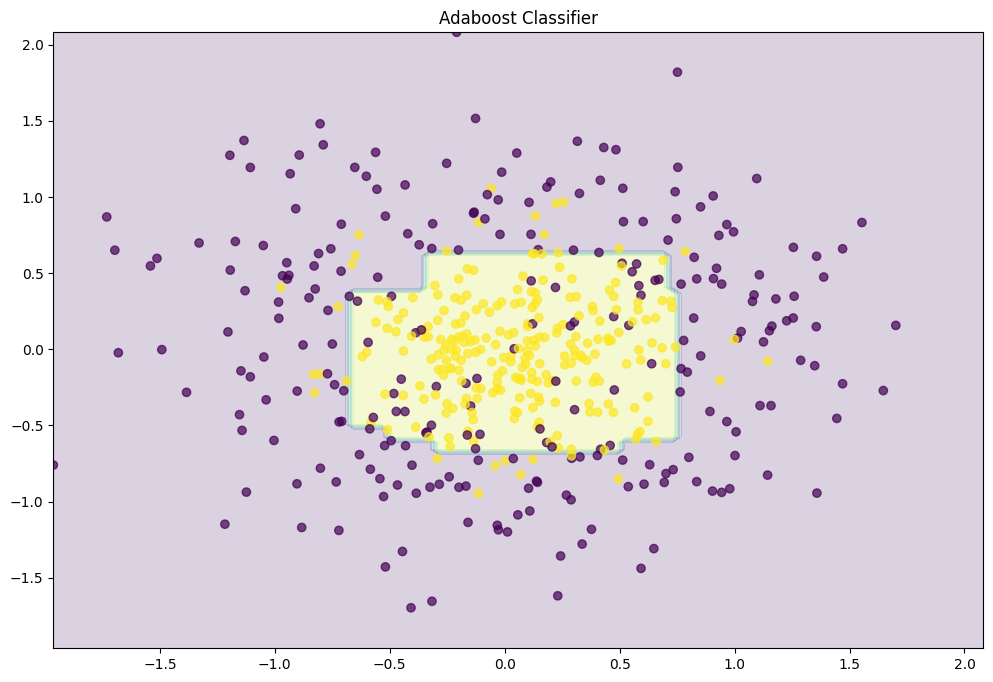

In [16]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [12]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
